https://www.kaggle.com/abcsds/pokemon

http://jkunst.com/r/pokemon-visualize-em-all/

Importing libraries and dataset.
Let's start by importing Pandas, which is a great library for managing relational (i.e. table-format) datasets:

In [27]:
# Pandas for managing datasets
import pandas as pd
%matplotlib inline



Next, we'll import Matplotlib, which will help us customize our plots further.

Tip: In Jupyter Notebook, you can also include %matplotlib inline to display your plots inside your notebook.

In [3]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

Then, we'll import the Seaborn library, which is the star of today's show.

In [4]:
# Seaborn for plotting and styling
import seaborn as sns

Now we're ready to import our dataset.

Tip: we gave each of our imported libraries an alias. Later, we can invoke Pandas with pd, Matplotlib with plt, and Seaborn with sns.
Today, we'll be using a cool Pokémon dataset (first generation).

Number: ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

In [5]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

Here's what the dataset looks like:

In [6]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Number,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49.0,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62.0,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82.0,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52.0,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64.0,58,80,65,80,2,False


As you can see, we have combat stats data for the original 151 (a.k.a best 151) Pokémon.

In [13]:
df.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Number,,,,,,,,,,,,
147,Dratini,Dragon,NaN,300,41,64.0,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84.0,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134.0,95,100,100,80,3,False
150,Mewtwo,Psychic,NaN,680,106,110.0,90,154,90,130,1,True
151,Mew,Psychic,NaN,600,100,100.0,100,100,100,100,1,False


One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
The second way is to directly pass in Series of data to the axes arguments.
For example, let's compare the Attack and Defense stats for our Pokémon:

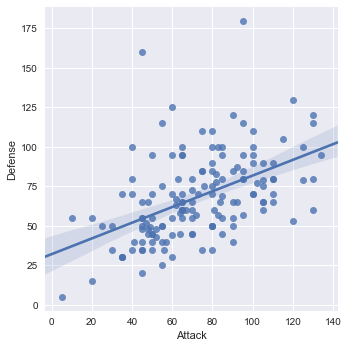

In [14]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

Let's say we wanted to make a box plot for our Pokémon's combat stats:


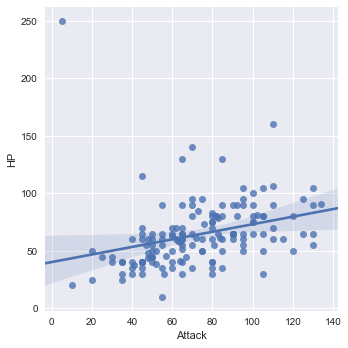

In [15]:
sns.lmplot(x='Attack', y='HP', data=df)

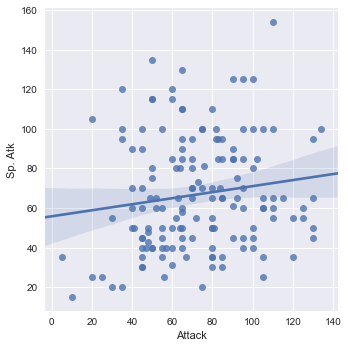

In [16]:
sns.lmplot(x='Attack', y='Sp. Atk', data=df)

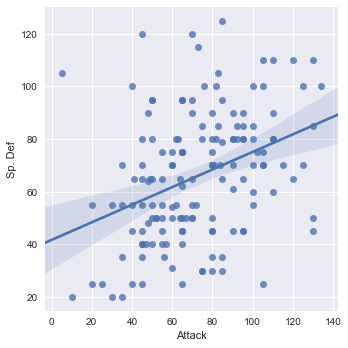

In [17]:
sns.lmplot(x='Attack', y='Sp. Def', data=df)

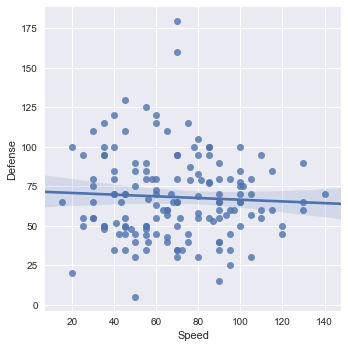

In [23]:
sns.lmplot(x='Speed', y='Defense', data=df)

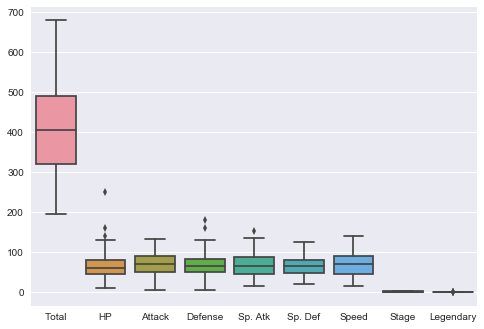

In [15]:
# Boxplot
sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:

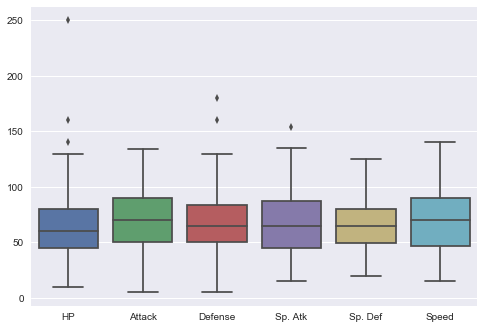

In [16]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use Bulbapedia to help us create a new color palette:

In [8]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

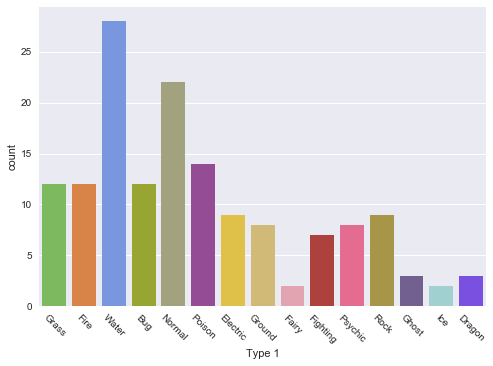

In [9]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

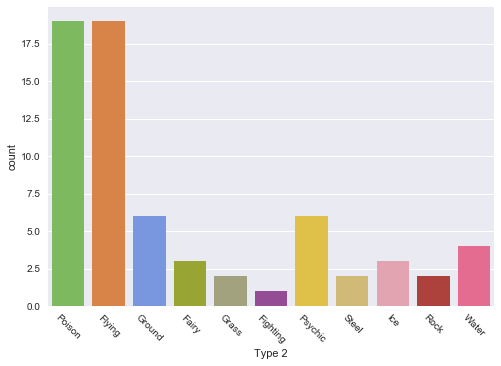

In [10]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 2', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

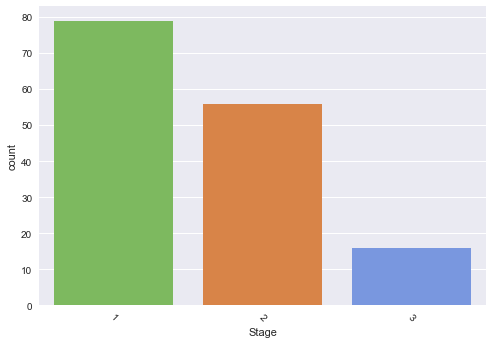

In [18]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Stage', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

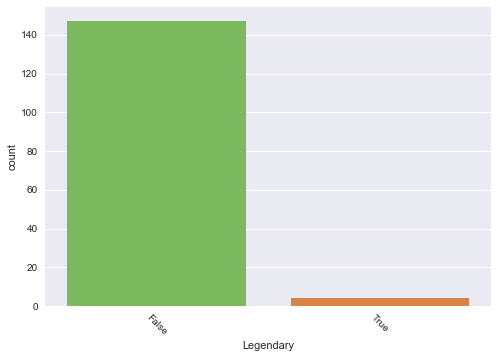

In [19]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Legendary', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1114724e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111baecc0>]], dtype=object)

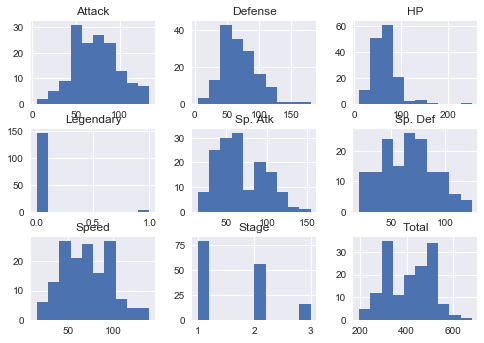

In [22]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111e2ba90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113f748d0>]], dtype=object)

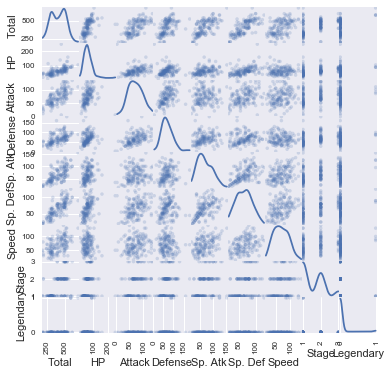

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
